In [1]:
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
ipo_df = pd.read_csv("C:/Users/davir/davigit/Projeto_Intro_CD/datasets/ipos_1521.csv")
precoipo = pd.read_csv("C:/Users/davir/davigit/Projeto_Intro_CD/datasets/preco_abe_ipo.csv")

In [2]:
tickers = ["PSVM11" , "WIZS3" ,  "AALR3" , "MOVI3" , "PARD3", "AZUL4", "CRFB3", "IRBR3", "OMGE3", "CAML3", 
                  "BKBR3", "BRDT3", "GNDI3", "HAPV3", "BIDI4", "SBFG3","NEOE3", "VIVA3", "BMGB4", "CEAB3", 
                  "MTRE3", "LWSA3", "MDNE3", "PRNR3", "ALPK3", "AMBP3", "SOMA3", "DMVF3", "LJQQ3", "LAVV3", 
                  "PGMN3", "PETZ3", "PLPL3", "MELK3", "HBSA3", "CURY3", "BOAS3", "SEQL3", "GMAT3", "TFCO4", 
                  "CASH3", "ENJU3", "AERI3", "RRRP3", "AVLL3", "RDOR3", "NGRD3"]
abertura = list(precoipo['preco'])
dict_tickers = dict(zip(tickers, abertura))

In [3]:
date_list = []
for ticker in tickers:
    df = ipo_df[ipo_df.codneg==ticker]
    date_list.append(df["date"].iloc[0])
    
date_ipo_df = pd.DataFrame(list(zip(tickers, date_list)), columns=["tickers", "date"])
date_ipo_df["date"] = pd.to_datetime(date_ipo_df["date"], format='%Y-%m-%d')
date_ipo_df.head()

,tickers,date
0,PSVM11,2015-03-10
1,WIZS3,2015-06-05
2,AALR3,2016-10-28
3,MOVI3,2017-02-08
4,PARD3,2017-02-14


In [4]:
lista = []
for i in range(2015, 2021):
    quant = date_ipo_df[date_ipo_df['date'].dt.year == i].count()[0]
    lista.append(quant)

ipos_per_year = list(zip([str(i) for i in range(2015, 2021)], lista))
ipos_per_year = pd.DataFrame(ipos_per_year, columns=["Year", "Quantity"])
ipos_per_year


,Year,Quantity
0,2015,2
1,2016,1
2,2017,9
3,2018,3
4,2019,5
5,2020,27


## Quantity of IPO's per Year

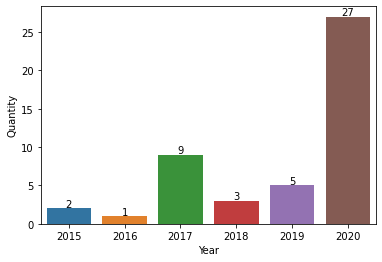

In [7]:
quant_year_b = sns.barplot(x="Year", y="Quantity", data=ipos_per_year)
for index, row in ipos_per_year.iterrows():
    quant_year_b.text(row.name, row.Quantity+0.15, round(row.Quantity,2), color="black", ha="center")


## Mean Rentability 

## Comparison Rentability 2015-2019 and 2020

## Deaths by Covid and Volatility

## Correlation Death x Volatility

## Histogram about the Returns One-year IPO

## Comparison 'IPO ETF' and IBOVESPA